<a href="https://colab.research.google.com/github/djiraffs/Deep-Learning/blob/main/Week%202/week_2_Tugas_Covertgz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metode TensorFlow

In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('compressed_data.csv.gz')

# Cek struktur dataset
print(data.info())

# Pisahkan fitur dan target
X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type'] - 1  # Shift label dari [1,7] menjadi [0,6]

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konversi ke Tensor untuk PyTorch
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

# PyTorch Model
class MLP_PyTorch(nn.Module):
    def __init__(self, input_dim):
        super(MLP_PyTorch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, len(np.unique(y)))
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_torch = MLP_PyTorch(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

# TensorFlow Model
model_tf = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training TensorFlow Model
history = model_tf.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7361 - loss: 0.6291 - val_accuracy: 0.7917 - val_loss: 0.4815
Epoch 2/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8003 - loss: 0.4658 - val_accuracy: 0.8164 - val_loss: 0.4337
Epoch 3/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8201 - loss: 0.4253 - val_accuracy: 0.8277 - val_loss: 0.4087
Epoch 4/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.8319 - loss: 0.4001 - val_accuracy: 0.8364 - val_loss: 0.3910
Epoch 5/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.8403 - loss: 0.3851 - val_accuracy: 0.8447 - val_loss: 0.3734
Epoch 6/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8462 - loss: 0.3706 - val_accuracy: 0.8507 - val_loss: 0.3648
Epoch 7/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.8502 - loss: 0.3638 - val_accuracy: 0.8505 - val_loss: 0.3638
Epoch 8/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Prediksi probabilitas dan kelas
y_pred_probs_tf = model_tf.predict(X_test)
y_pred_classes_tf = y_pred_probs_tf.argmax(axis=1)

# Hitung metrik evaluasi
precision_tf = precision_score(y_test, y_pred_classes_tf, average="weighted")
recall_tf = recall_score(y_test, y_pred_classes_tf, average="weighted")
f1_tf = f1_score(y_test, y_pred_classes_tf, average="weighted")
auc_tf = roc_auc_score(y_test, y_pred_probs_tf, multi_class="ovr")

# Simpan hasil evaluasi ke file training_history.pkl
tf_history.update({
    "precision": precision_tf,
    "recall": recall_tf,
    "f1_score": f1_tf,
    "auc": auc_tf
})

with open("training_history.pkl", "wb") as f:
    pickle.dump(tf_history, f)


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [57]:
import pickle

# Simpan history training ke dalam file
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print("Training history saved to training_history.pkl")


Training history saved to training_history.pkl


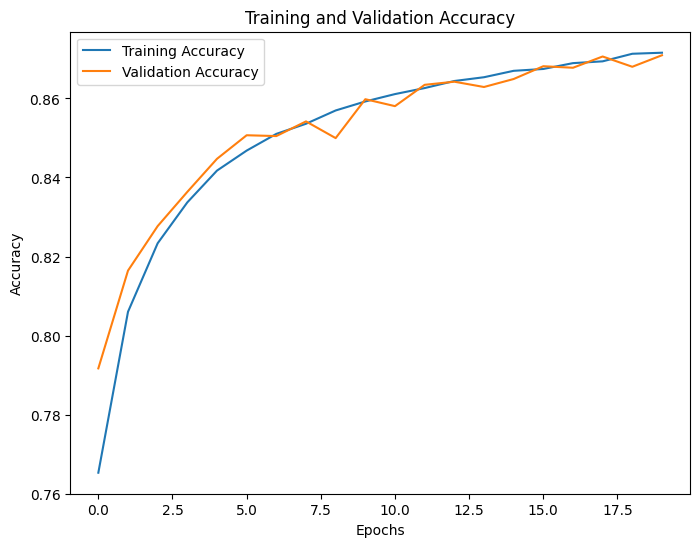

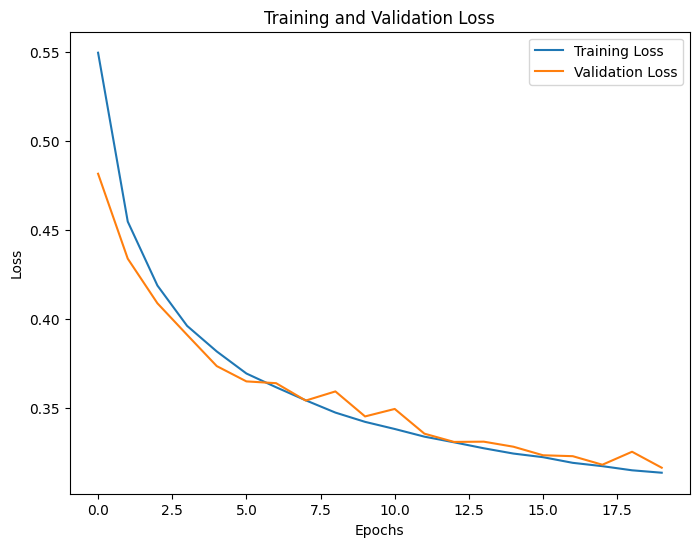

In [58]:
import pickle
import matplotlib.pyplot as plt

# Load history training
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot akurasi
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Metode Pytorch

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("compressed_data.csv.gz")

# Pisahkan fitur dan target
X = df.drop(columns=["Cover_Type"]).values
y = df["Cover_Type"].values

# Pastikan label mulai dari 0 (hindari IndexError pada CrossEntropyLoss)
y -= y.min()

# Bagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi ke tensor
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Definisi model MLP
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Inisialisasi model
input_size = X_train.shape[1]
num_classes = len(set(y))  # Pastikan jumlah kelas benar
model = MLP(input_size, num_classes)

# Loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    # Evaluasi pada training set
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_train_torch).sum().item() / y_train_torch.size(0)
    train_loss_history.append(loss.item())
    train_accuracy_history.append(accuracy)

    # Evaluasi pada validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == y_test_torch).sum().item() / y_test_torch.size(0)

    val_loss_history.append(val_loss.item())
    val_accuracy_history.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")

# Simpan hasil training ke file
history = {
    "train_loss": train_loss_history,
    "train_accuracy": train_accuracy_history,
    "val_loss": val_loss_history,
    "val_accuracy": val_accuracy_history,
}
with open("pytorch_history.pkl", "wb") as f:
    pickle.dump(history, f)


Epoch 1/20, Loss: 1.8649, Accuracy: 0.3084, Val Loss: 1.8290, Val Accuracy: 0.4207
Epoch 2/20, Loss: 1.8294, Accuracy: 0.4226, Val Loss: 1.7940, Val Accuracy: 0.4698
Epoch 3/20, Loss: 1.7944, Accuracy: 0.4719, Val Loss: 1.7593, Val Accuracy: 0.4889
Epoch 4/20, Loss: 1.7598, Accuracy: 0.4910, Val Loss: 1.7250, Val Accuracy: 0.5057
Epoch 5/20, Loss: 1.7254, Accuracy: 0.5084, Val Loss: 1.6907, Val Accuracy: 0.5160
Epoch 6/20, Loss: 1.6912, Accuracy: 0.5184, Val Loss: 1.6565, Val Accuracy: 0.5177
Epoch 7/20, Loss: 1.6569, Accuracy: 0.5200, Val Loss: 1.6220, Val Accuracy: 0.5167
Epoch 8/20, Loss: 1.6225, Accuracy: 0.5186, Val Loss: 1.5874, Val Accuracy: 0.5162
Epoch 9/20, Loss: 1.5879, Accuracy: 0.5178, Val Loss: 1.5527, Val Accuracy: 0.5170
Epoch 10/20, Loss: 1.5532, Accuracy: 0.5187, Val Loss: 1.5179, Val Accuracy: 0.5192
Epoch 11/20, Loss: 1.5184, Accuracy: 0.5207, Val Loss: 1.4833, Val Accuracy: 0.5213
Epoch 12/20, Loss: 1.4837, Accuracy: 0.5227, Val Loss: 1.4490, Val Accuracy: 0.5240
E

In [64]:
import pickle

file_path = "training_history.pkl"

try:
    with open(file_path, "rb") as f:
        history = pickle.load(f)
    print("Data dalam training_history.pkl berhasil dimuat!")
    print("Keys tersedia:", history.keys())
except EOFError:
    print("Error: File kosong atau rusak.")
except FileNotFoundError:
    print("Error: File tidak ditemukan.")


Data dalam training_history.pkl berhasil dimuat!
Keys tersedia: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [68]:
import torch
import torch.nn.functional as F
import pickle
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Pastikan model dalam mode evaluasi
model_torch.eval()

# Konversi logit ke probabilitas dengan softmax
y_pred_probs_torch = F.softmax(model_torch(X_test_torch), dim=1).detach().numpy()
y_pred_classes_torch = np.argmax(y_pred_probs_torch, axis=1)

# Hitung metrik evaluasi
precision_torch = precision_score(y_test, y_pred_classes_torch, average="weighted", zero_division=1)
recall_torch = recall_score(y_test, y_pred_classes_torch, average="weighted", zero_division=1)
f1_torch = f1_score(y_test, y_pred_classes_torch, average="weighted", zero_division=1)
auc_torch = roc_auc_score(y_test, y_pred_probs_torch, multi_class="ovr", average="weighted")

# Binarisasi label untuk ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(np.unique(y_test))))

# Simpan ROC Curve untuk setiap kelas
fpr_torch, tpr_torch = {}, {}
for i in range(y_test_bin.shape[1]):
    fpr_torch[i], tpr_torch[i] = roc_curve(y_test_bin[:, i], y_pred_probs_torch[:, i])[:2]

# Simpan hasil evaluasi ke file history
pytorch_history.update({
    "precision": precision_torch,
    "recall": recall_torch,
    "f1_score": f1_torch,
    "auc": auc_torch,
    "roc_curve": {i: (fpr_torch[i].tolist(), tpr_torch[i].tolist()) for i in fpr_torch}
})

# Simpan ke file
with open("pytorch_history.pkl", "wb") as f:
    pickle.dump(pytorch_history, f)


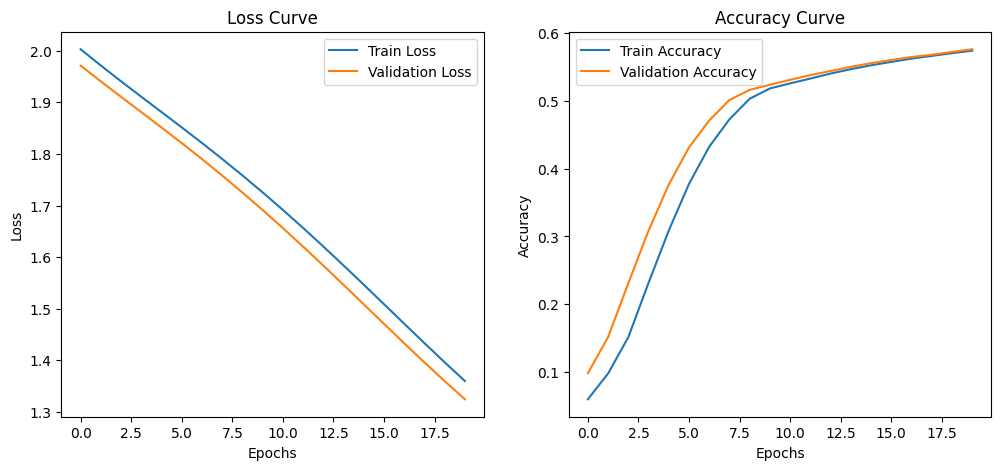

In [69]:
import pickle
import matplotlib.pyplot as plt

# Load history dari file pkl
with open("pytorch_history.pkl", "rb") as f:
    history = pickle.load(f)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history["train_accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()


PyTorch Keys: dict_keys(['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy', 'precision', 'recall', 'f1_score', 'auc', 'roc_curve'])
TensorFlow Keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


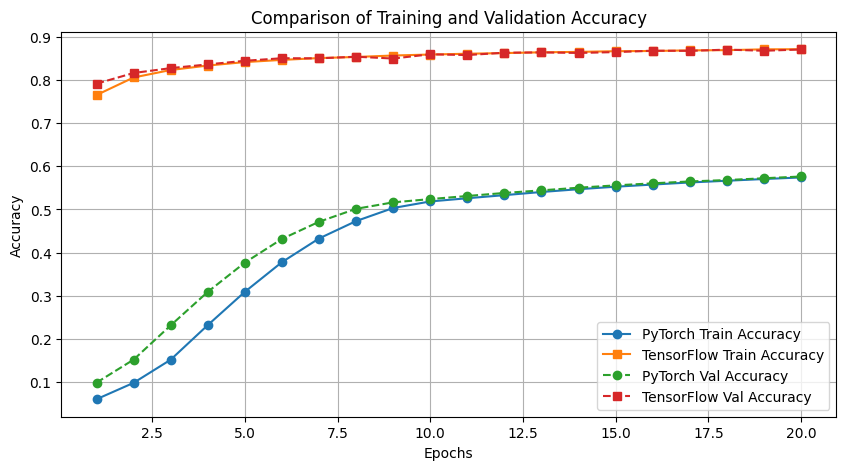

In [70]:
import pickle
import matplotlib.pyplot as plt

# Load history dari file pkl
with open("pytorch_history.pkl", "rb") as f:
    pytorch_history = pickle.load(f)

with open("training_history.pkl", "rb") as f:
    tf_history = pickle.load(f)

# Periksa keys yang tersedia
print("PyTorch Keys:", pytorch_history.keys())
print("TensorFlow Keys:", tf_history.keys())

# Ambil data akurasi
epochs = range(1, len(pytorch_history["train_accuracy"]) + 1)

plt.figure(figsize=(10, 5))

# Plot akurasi training
plt.plot(epochs, pytorch_history["train_accuracy"], label="PyTorch Train Accuracy", marker='o')
plt.plot(epochs, tf_history.get("accuracy", []), label="TensorFlow Train Accuracy", marker='s')

# Plot akurasi validasi
plt.plot(epochs, pytorch_history["val_accuracy"], label="PyTorch Val Accuracy", linestyle='dashed', marker='o')
plt.plot(epochs, tf_history.get("val_accuracy", []), label="TensorFlow Val Accuracy", linestyle='dashed', marker='s')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

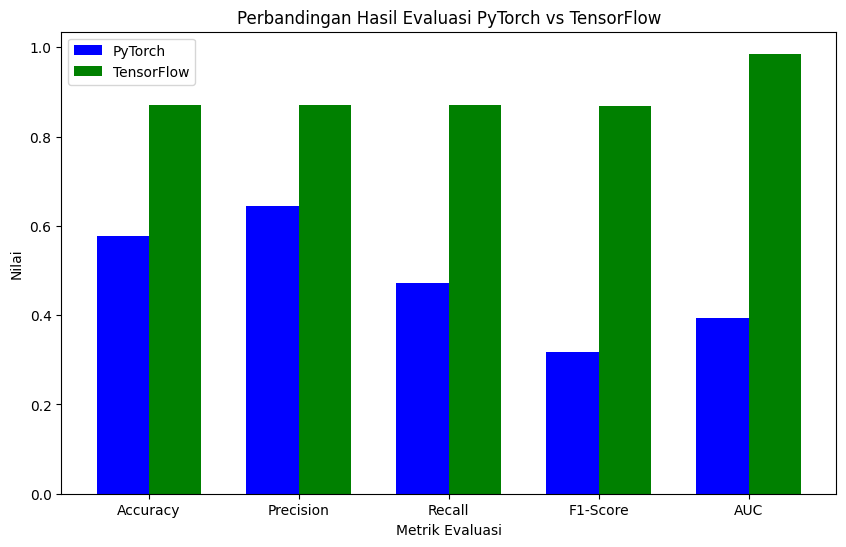

In [79]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd

# Load history dari file pkl
with open("pytorch_history.pkl", "rb") as f:
    pytorch_history = pickle.load(f)

with open("training_history.pkl", "rb") as f:
    tf_history = pickle.load(f)

# Fungsi untuk mengambil nilai terakhir jika berupa list
def get_last_value(value):
    if isinstance(value, list):
        return value[-1] if value else 0  # Ambil elemen terakhir jika list tidak kosong
    return value if value is not None else 0

# Ambil nilai terakhir dari TensorFlow history
accuracy_tf = get_last_value(tf_history.get("accuracy"))
precision_tf = get_last_value(tf_history.get("precision"))
recall_tf = get_last_value(tf_history.get("recall"))
f1_tf = get_last_value(tf_history.get("f1_score"))
auc_tf = get_last_value(tf_history.get("auc"))

# Ambil nilai terakhir dari PyTorch history
accuracy_torch = get_last_value(pytorch_history.get("val_accuracy"))
precision_torch = get_last_value(pytorch_history.get("precision"))
recall_torch = get_last_value(pytorch_history.get("recall"))
f1_torch = get_last_value(pytorch_history.get("f1_score"))
auc_torch = get_last_value(pytorch_history.get("auc"))

# Siapkan data untuk visualisasi
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
pytorch_values = [accuracy_torch, precision_torch, recall_torch, f1_torch, auc_torch]
tf_values = [accuracy_tf, precision_tf, recall_tf, f1_tf, auc_tf]

# Pastikan semua nilai adalah angka agar bisa diproses dalam grafik
pytorch_values = [float(val) if isinstance(val, (int, float)) else 0 for val in pytorch_values]
tf_values = [float(val) if isinstance(val, (int, float)) else 0 for val in tf_values]

# Visualisasi Perbandingan
plt.figure(figsize=(10, 6))
index = np.arange(len(metrics))
bar_width = 0.35

plt.bar(index, pytorch_values, bar_width, label="PyTorch", color="b")
plt.bar(index + bar_width, tf_values, bar_width, label="TensorFlow", color="g")

plt.xlabel("Metrik Evaluasi")
plt.ylabel("Nilai")
plt.title("Perbandingan Hasil Evaluasi PyTorch vs TensorFlow")
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.show()

Dari hasil evaluasi, model yang dikembangkan menggunakan TensorFlow menunjukkan performa yang lebih baik dibandingkan dengan model yang dibangun menggunakan PyTorch pada hampir semua metrik evaluasi, termasuk akurasi, presisi, recall, F1-score, dan AUC. Model TensorFlow memiliki akurasi yang lebih tinggi, menunjukkan bahwa model ini lebih mampu dalam mengklasifikasikan data dengan benar

Namun, perbedaan ini bisa terjadi karena beberapa faktor seperti arsitektur model, hyperparameter tuning, teknik optimasi, dan parameter pelatihan yang digunakan dalam masing-masing framework.

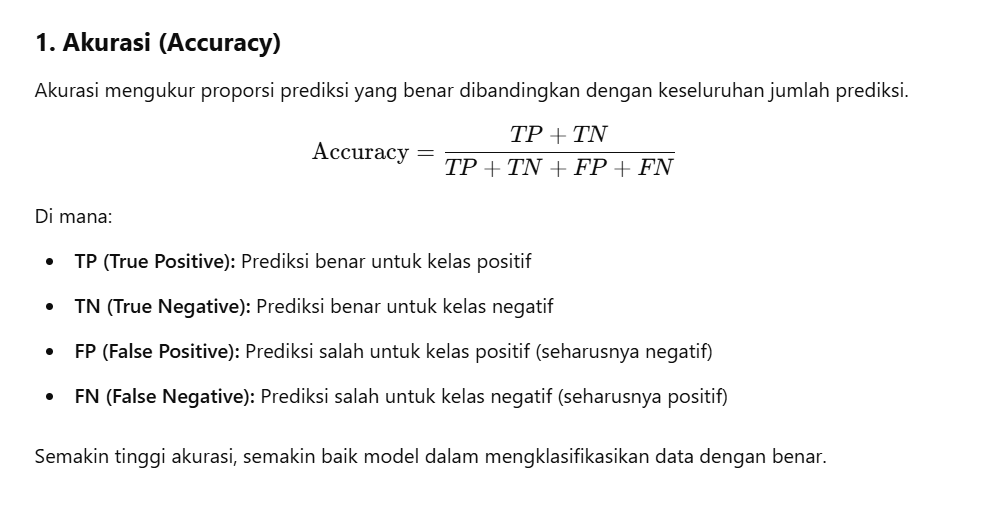

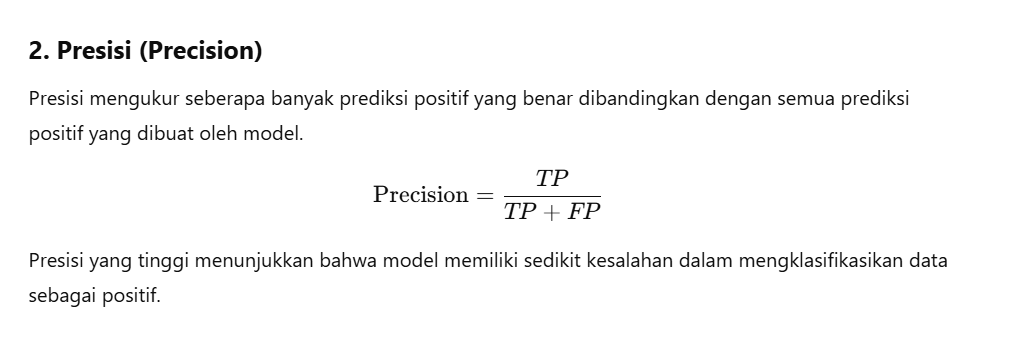

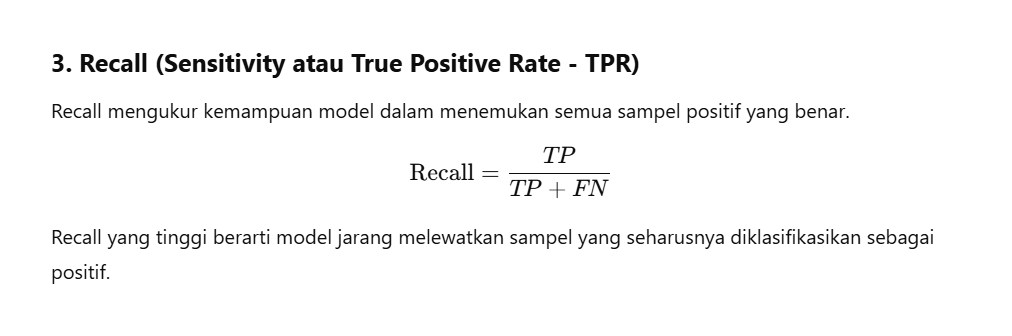

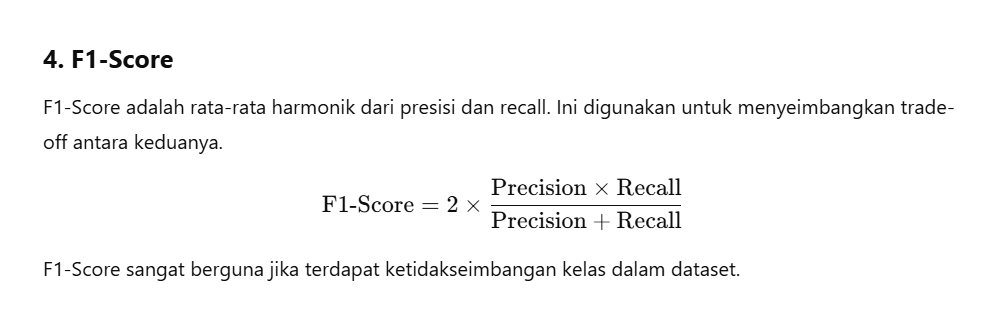

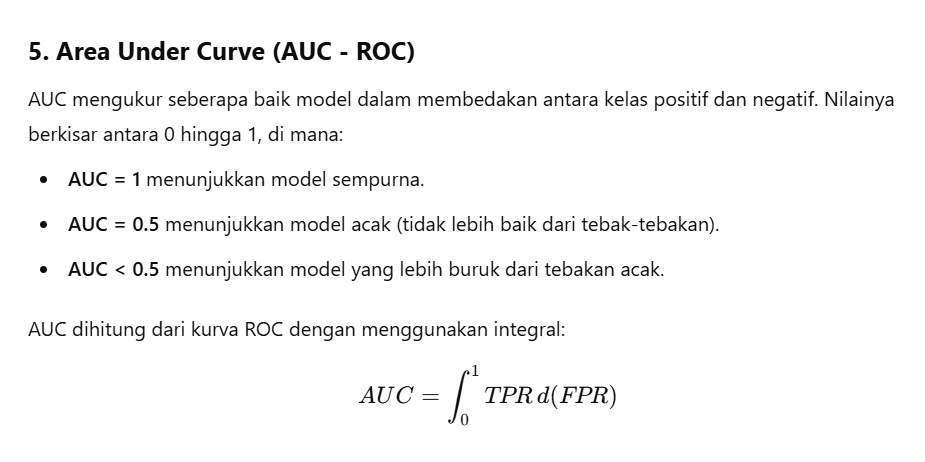

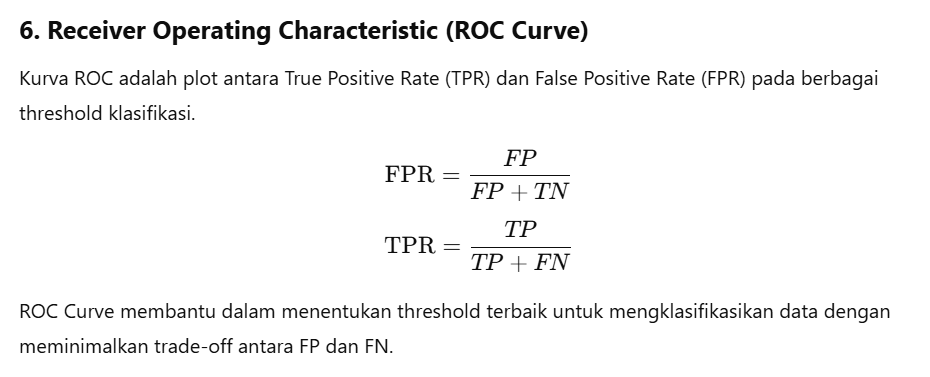